# HW 3: Data Visualisation 

## Introduction
You probably already have some knowledge in data visualization that you may have acquired in other dedicated courses. The purpose of this assignment is not to teach you all aspects of data visualization and the associated challenges.  The goal is that by the end of this homework, you will be able to generate visualizations of your data useful when working with machine learning algorithms. There are three aspects you want to visualize: before starting you need to have an idea of your data in general, and of your labels in particular. After having deployed your machine learning you need to be able to visualize the results of f.ex. classifier. 

This HW does not replace the visualization tools you already know, but it will allow you to create visualizations to understand your data or evaluate your results without having to export your data and import it into your favorite software and go back and forth every time you make a change. Using libraries such as Matplotlib and Seaborn, you'll be able to create a variety of plots, including histograms, scatter plots, confusion matrix, and more. These visualizations will enable you to gain valuable insights from your data and classifiers/regressor.

This HW focuses on a few visualizations libraries for Python. You will see how these tools can be used to quickly explore your data, understand their structure, and effectively evaluate your results.

For the sake of colorblind-people, you can create your custom signature color-palettes:
- [coolors](https://coolors.co/)
And then check [here](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40) to get a "feeling" of how colorblind people would see your palette. 


## Setting-up environment 
As always, the first step is making sure your environment is ready. Like you learned in previous HWs, the best practice is to have a virtual environment, either one per HW or one for the ML course. Once you have it, you can try to import the follow modules:

In [1]:
# Import section

# This is a very important library, which allow you to handle file path on macOS and Windows almost flawlessly 
# No more problem of / VS \ or use of the \\. You juste use Path(r"some_path"). The good practice is to use forward slash as it will work everywhere, but with the r at the start of the string, you should be fine with anything
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# The last line allow to show matplotlib graph in an easier way in the notebook
# It is juste an argument given to the matplotlib module

If you have an error, try to install the module(s) with the following line:

In [ ]:
#!pip install <module_name>
!pip install seaborn

## Exercise 1: Visualize data from HW1

For this first part, we will use a part of the dataset you used on the previous homework and do some easy and not-so-easy visualisation with it. 

### 1.1 Loading the data

Just as you saw last week, load the data to a DataFrame object, using any ways you prefer. (We proposed a way, feel free to change it :))

In [2]:
data_folder = Path('./data/')

df_ex1 = pd.read_csv(data_folder / "logging_data_merged.csv")


### 1.2: Explore the data

You already did that last week so no need to do it again ;). But if you want, feel free to add some insights of the data here :)

In [3]:
df_ex1.describe()

,timestamp,employee,floor,room
count,1.232900e+04,12329.000000,12329.000000,12329.000000
mean,1.677073e+09,168834.619109,3.293779,9.669316
std,1.455457e+04,35.352365,1.859782,8.462992
min,1.677050e+09,168773.000000,0.000000,0.000000
25%,1.677062e+09,168804.000000,2.000000,0.000000
50%,1.677073e+09,168834.000000,3.000000,9.000000
75%,1.677084e+09,168864.000000,5.000000,17.000000
max,1.677380e+09,168905.000000,6.000000,25.000000


In [4]:
df_ex1.dtypes

timestamp              int64
employee               int64
door                  object
floor                  int64
room                   int64
timestamp_readable    object
dtype: object

### 1.3 Pre-processing data

Here you can add steps needed to transform your data the way it needs to be, like changing timestamp_readable to datetime for example :)

In [6]:
df_ex1["timestamp_readable"] = pd.to_datetime(df_ex1["timestamp_readable"])

### 1.4 First plots, junior edition

*Visualizing a single variable: histogram*

There is almost an infinite ways of visualizing data in Python. Here you will see the basic ones to visualize one variable, using most comon libraries. The first thing we can do with ou data is to make histogram of some variables. The easiest way is to use a built-in pandas feature called hist().

<Axes: >

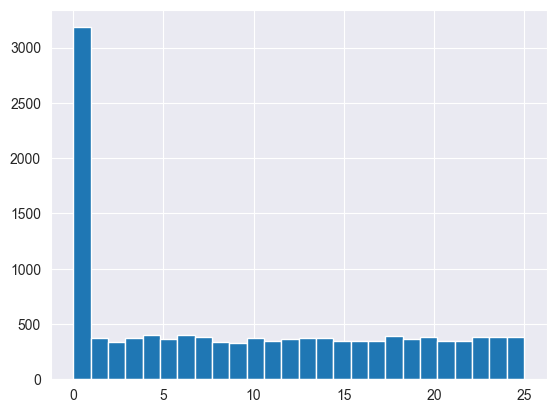

In [7]:
# Here we plot the number of access per room number:
number_of_rooms = len(df_ex1["room"].unique())
df_ex1["room"].hist(bins=number_of_rooms)

# By changing the column name, you change the column that is plotted.
# The first line is here to compute how many bars we want on our graph. You can try to run it with bins=5 for exemple to see the difference.

This graph is nice, but as you should know, it is missing some key elements to be a "correct" graph. To add elements of context, we can use the following element:
- plt.xlabel()
- plt.ylabel()
- plt.title() 

But for this, we need to import matplotlib (you already did it in the beginning of this HW). This allows to specify the title and the axis' names. 

In [ ]:
# You can use the pandas features
df_ex1["room"].hist(bins=number_of_rooms)

# Or directly matplotlib, either will work the same, with some aesthetic differences
#plt.hist(df["room"].values, bins=number_of_rooms)

# You can play with plt attribute to customize your graph, like color, legend for example
plt.xlabel('Room number')
plt.ylabel('Number of access')
plt.title('Rooms access - Histogram');

**Question**
Does the graph looks like you were expecting? Can you tell if it was a good idea to plot it like that?

Response: Each floor has a number 0 room, so it by plotting like that, we know that the door 0 is the most used, but not on which floor. Is it equally distributed or is it that only the door 0 on the fround floor is used?

Now, try to plot the distribution of the access by floor, and not by rooms

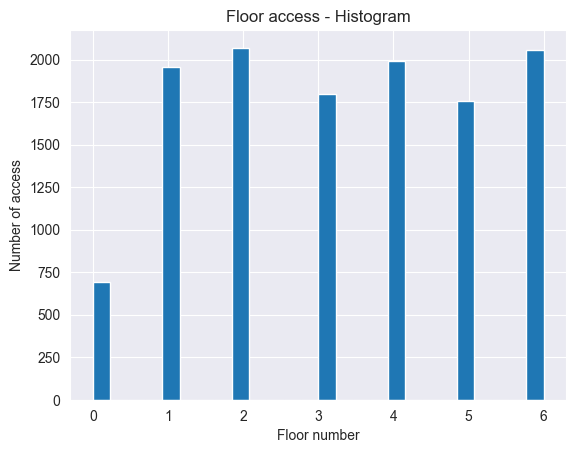

In [8]:
df_ex1["floor"].hist(bins=number_of_rooms)

# You can play with plt attribute to customize your graph, like color, legend for example
plt.xlabel('Floor number')
plt.ylabel('Number of access')
plt.title('Floor access - Histogram');


**Question**
Can you interpret it differently than the last one?

We can see that most access are distributed between floors 1-6 and floor 0 has less access than other floors. We don't have the problem of aggregating multiple floor like in the precedent graph.

*Visualizing a single variable: boxplot* 

Another way to plot the distribution of one variable is to use boxplot. This is especially useful to see outliers in your data. This can allow you to errors in records. For example, we can plot the timestamp of the rooms' access, using the following code:

Text(0.5, 1.0, 'Timestamps')

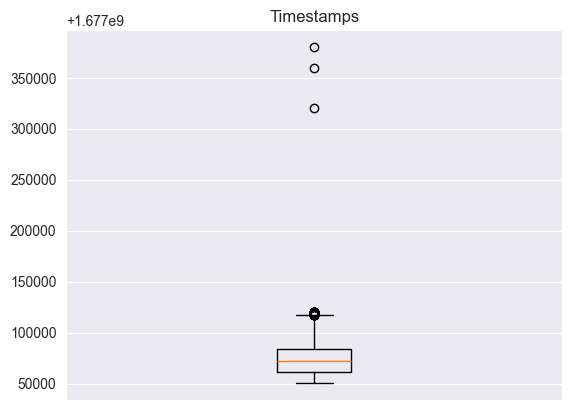

In [9]:
plt.boxplot(df_ex1['timestamp'])
# Removing the label on the x-axis
plt.xticks([])
plt.title('Timestamps')

**Question**
Do you see a problem with this graph? Can you conclude something on your data?

We can see three outliers at the top of the graph. It looks like there is also a problem with thy y-axis values, but it's because they have an offset :)


If you detect some big outliers (I hope you did ;)) can you try to explain them?
As we have two fields storing the timestamp information (timestamp and timestamp_readable) you should see if the error you detect in the timestamp is replicated in the timestamp_readable. Maybe it is juste a conversion or parsing error :)

Before plotting timestamp_readable, you should have converted it to datetime object in the previous steps. If you don't do so, the boxplot will have no meaning as it will only plot strings, with no real distribution analysis. 
Moreover, pandas matplotlib can't easily do boxplot of datetime object, so we will introduce a more advanced module: seaborn. It has most of the same features as matplotlib, but include some more advanced and easy-use ones. The syntax is basically the same, by replacing plt by sns: sns.boxplot(df["column_name"])

<Axes: ylabel='timestamp_readable'>

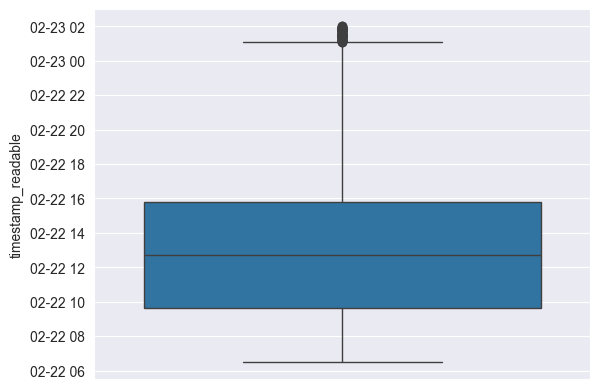

In [10]:
# As we changed the type of the column timestamp_readable in the pre-processing step, it just works right away. It your column is style a str, then it will certainly not display or display quiet a big mess :)
sns.boxplot(df_ex1['timestamp_readable'])

**Question**
Do you notice any difference with the boxplot of the column _timestamp_?

The outliers we saw in the previous boxplot don't show up in this one. It is strange because it is supposed to be the same data... **suspens...**


![Let's hope this works...](./HW3_DataVizz/ressources/gif/dr-seuss.gif)

### 1.5 Stepping up: comparing two variables

You certainly noticed a difference in the distribution of timestamp and timestamp_readable, although they should represent the same information, just in a different format. We will see a way to plot two variable, one per axis. It allows to compare the variation of the two variables. As the two variables should exactly be the same, we are expecting them to lay on the line y=x.
Reference: [Scatter plot in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

<Axes: xlabel='timestamp', ylabel='timestamp_readable'>

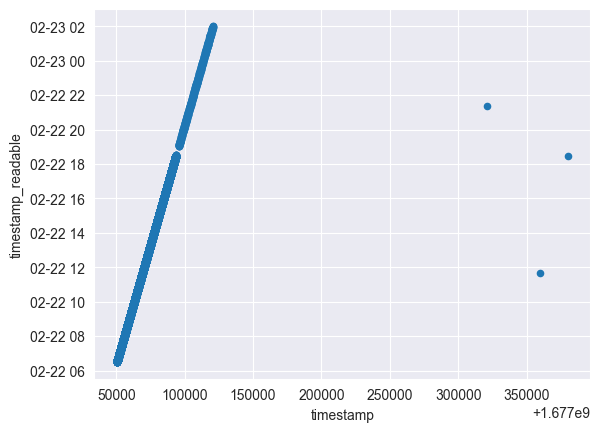

In [15]:
df_ex1.plot.scatter(x='timestamp', y='timestamp_readable')

Now, we can get back to our visualisation of rooms and floors. Before, we did two histograms, one for each variable. But what if we want to compare those two distributions? We will show you two ways of doing that: the joint-plot and "violin" plot of seaborn and the classic heatmap:

#### 1.5.1: Joint-plot
You can try to play with the kind= parameter to get other type of visualisation in the plot. 

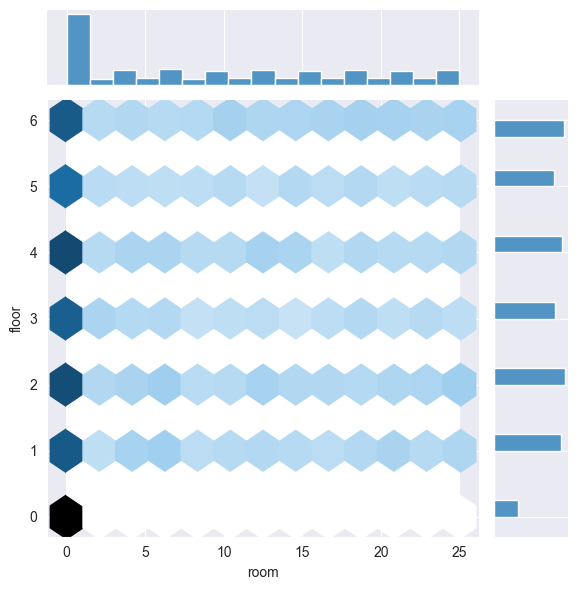

In [16]:
# The seaborn way (easy, aesthetic but not very precise)
sns.jointplot(x=df_ex1['room'], y=df_ex1['floor'], kind="hex", gridsize=len(df_ex1['floor'].unique())*2-2)

#### 1.5.2: Violin-plot

<Axes: xlabel='floor', ylabel='room'>

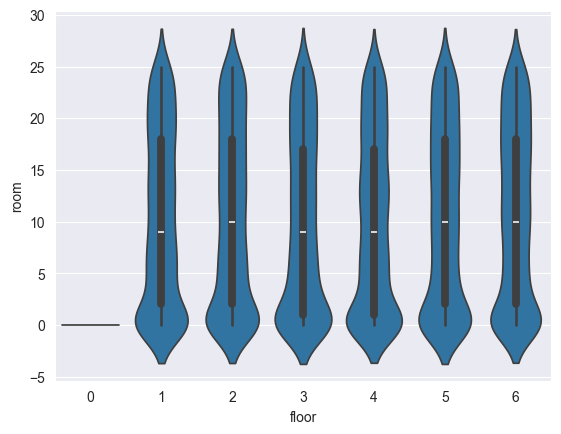

In [17]:
# Another way to compare two variables (suppose to look like VIOLIN...)
sns.violinplot(df_ex1, x='floor', y='room')

![Another try :)](./HW3_DataVizz/ressources/gif/violin-tiny.gif)

### 1.5.3: Heatmap

To do a heatmap in Python, the most common way is to build a new dataframe containing the heatmap data, and then visualize it as an heatmap

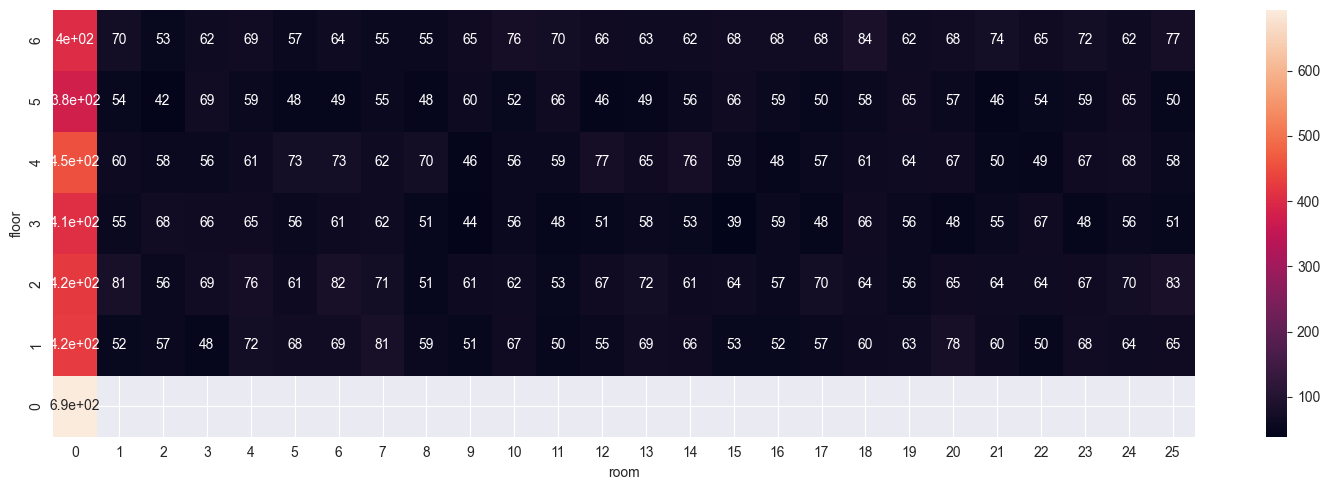

In [18]:
# To do the heatmap, we have to build it ourselves
# First, we do a value_counts to have a df with the door number as index, and the count as value
heatmap_df = df_ex1["door"].value_counts()
# Then we reset the index to make a "2 columns" dataframe (door and count)
heatmap_df = heatmap_df.reset_index()
# Then we split the door column into two columns, the floor and the room
heatmap_df['floor'] = heatmap_df['door'].apply(lambda string: int(string.split('-')[0]))
heatmap_df['room'] = heatmap_df['door'].apply(lambda string: int(string.split('-')[-1]))

# We drop the column door because we don't need it anymore
heatmap_df.drop('door', axis=1, inplace=True)

# We do a pivot to get the floors as indexes (y-axis) and the rooms as column names (x-axis)
heatmap_df = heatmap_df.pivot(columns='room',index='floor',values='count')
# We sort the index so that the floor 0 is at the bottom of the graph
heatmap_df.sort_index(ascending=False, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(15, 5)) # choosing the size of the graph (not too small
sns.heatmap(heatmap_df, annot=True)
# Using a function that make the graph it better, you can try with and without it to see what suits you the best
plt.tight_layout() 



**Question**
Can you try it to make a function that take as argument a dataframe, two columns and show a heatmap (you can help you with the above code?

In [21]:
def heatmap(dataframe, x_column: str, y_column: str, base_column=None, splitchar=None):
    if base_column is None: base_column = x_column
    heatmap_df = dataframe[base_column].value_counts()
    heatmap_df = heatmap_df.reset_index()

    if splitchar is not None:
        heatmap_df[x_column] = heatmap_df[base_column].apply(lambda string: int(string.split(splitchar)[0]))
        heatmap_df[y_column] = heatmap_df[base_column].apply(lambda string: int(string.split(splitchar)[-1]))

        heatmap_df.drop(base_column, axis=1, inplace=True)

    heatmap_df = heatmap_df.pivot(columns=y_column,index=x_column,values='count')
    
    heatmap_df.sort_index(ascending=False, inplace=True)
    
    return heatmap_df



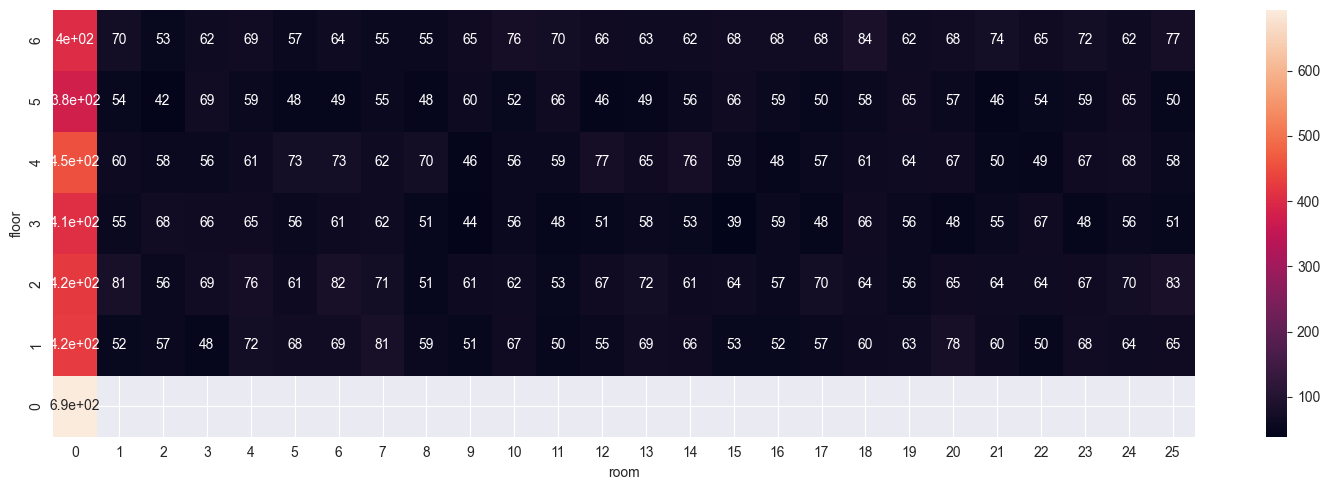

In [22]:
heatmap = heatmap(df_ex1, x_column='floor', y_column='room', base_column='door', splitchar='-')
# Plotting the heatmap
plt.figure(figsize=(15, 5)) # choosing the size of the graph (not too small
sns.heatmap(heatmap, annot=True)
# Using a function that make the graph it better, you can try with and without it to see what suits you the best
plt.tight_layout() 

**Bonus Question**
With those three visualizations, what can you say about the layout of the building? And what hypothesis can you make about the habits of the employees?

## Exercise 2: Monitoring of Federal Criminal Sentences

For this exercise, you will have data containing a multitude of information concerning criminal sentences in the US ([source](https://www.icpsr.umich.edu/web/NACJD/studies/37975/versions/V1#)). The goal of this exercise is to gain insights of this data through visualisation(s)

### 2.1 Load the data

In [23]:
data_folder_ex2 = Path(r"data/Criminal_sentences/data")

# sep= parameter specifies what character is used to separate columns
df_ex2 = pd.read_csv(data_folder_ex2 / "0001-Data_with_predictions.tsv", sep="\t")
df_ex2.head()

/var/folders/rw/16hwqdpd6xn7vzxmfjjlfbxh0000gn/T/ipykernel_37531/1554797700.py:4: DtypeWarning: Columns (8,18,21,223,224,250,494) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ex2 = pd.read_csv(data_folder_ex2 / "0001-Data_with_predictions.tsv", sep="\t")


,Unnamed: 0,USSCIDN,AGE,CIRCDIST,CITIZEN,CITWHERE,DISTRICT,DOBMON,DOBYR,EDUCATN,...,XMAXSOR,XMINSOR,DSIND,DSJANDC,DSPLEA,DSPSR,DSSOR,SENTTOT_PREDICT1,SENTTOT_PREDICT2,SENTTOT_PREDICT3
0,0,2352954,35.0,45,1,211,51,11.0,1980,21,...,46,37,1,1,1,1,1,42.0,458,0.0
1,1,2352955,29.0,79,1,211,83,7.0,1987,12,...,135,108,1,1,1,1,1,127.0,481,158.0
2,2,2352958,24.0,64,3,49,70,6.0,1992,9,...,57,46,1,1,1,1,1,0.0,515,176.0
3,3,2352960,44.0,61,1,211,68,11.0,1971,10,...,78,63,1,1,1,1,1,226.0,431,0.0
4,4,2352962,38.0,80,3,49,84,4.0,1978,21,...,96,77,1,1,1,1,1,0.0,426,24.0


### 2.2 Explore the data

Use what you learned last week (and maybe more) to get a first understanding of the data. For example, can you tell what are the datatypes, the principal statistic characteristics, and so on? If you need (I hope you don't) but you can read the Codebook.pdf to see the column's list and the documentation. 

In [24]:
df_ex2.describe()

,Unnamed: 0,USSCIDN,AGE,CIRCDIST,DISTRICT,DOBMON,HISPORIG,MONCIRC,MONRACE,MONSEX,...,TOTPRISN,TYPEOTHS,DSIND,DSJANDC,DSPLEA,DSPSR,DSSOR,SENTTOT_PREDICT1,SENTTOT_PREDICT2,SENTTOT_PREDICT3
count,66873.000000,6.687300e+04,66788.000000,66873.000000,66873.000000,66788.000000,66873.000000,66873.000000,66873.000000,66754.000000,...,66873.000000,66873.000000,66873.000000,66873.000000,66873.000000,66873.000000,66873.000000,61029.000000,66873.000000,60945.000000
mean,33436.000000,2.389127e+06,36.506917,49.478983,47.937329,6.590585,1.495940,6.755133,1.451154,0.133565,...,66.661807,0.063120,1.008434,1.000882,2.185755,1.388513,1.066350,104.183517,471.750348,104.961539
std,19304.716613,2.026803e+04,11.149446,25.134760,24.141650,3.433919,0.557485,2.833850,1.064177,0.340187,...,491.192768,1.940058,0.132343,0.029690,1.979447,1.562133,0.630013,105.169119,29.119992,105.170214
min,0.000000,2.352954e+06,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,422.000000,0.000000
25%,16718.000000,2.371942e+06,28.000000,35.000000,31.000000,4.000000,1.000000,5.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,447.000000,3.730000
50%,33436.000000,2.389071e+06,35.000000,44.000000,42.000000,7.000000,2.000000,6.000000,1.000000,0.000000,...,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,472.000000,91.000000
75%,50154.000000,2.406278e+06,43.000000,68.000000,70.000000,10.000000,2.000000,9.000000,2.000000,0.000000,...,60.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,171.000000,497.000000,171.000000
max,66872.000000,2.444570e+06,93.000000,94.000000,96.000000,12.000000,2.000000,11.000000,10.000000,1.000000,...,9997.000000,77.000000,3.000000,2.000000,9.000000,8.000000,8.000000,4197.000000,522.000000,4310.000000


In [25]:
df_ex2.dtypes

Unnamed: 0            int64
USSCIDN               int64
AGE                 float64
CIRCDIST              int64
CITIZEN              object
                     ...   
DSPSR                 int64
DSSOR                 int64
SENTTOT_PREDICT1    float64
SENTTOT_PREDICT2      int64
SENTTOT_PREDICT3    float64
Length: 531, dtype: object

In [26]:
# number of unique ID
len(df_ex2["USSCIDN"].unique())

66873

As you should have noticed, there is a LOT of columns in those data. We will use the following columns:
- AGE - Age of the defendant
- DOBMON - DEFENDANT'S MONTH OF BIRTH
- MONSEX - DEFENDANT'S GENDER
- SENTTOT - TOTAL PRISON SENTENCE IN MONTHS WITHOUT ZEROS
- SENTMON - MONTH OF SENTENCING
- FINE - DOLLAR AMOUNT OF FINE ORDERED
- SENTTOT_PREDICT1 - SENTENCE PREDICTED BY AN ALGORITHM
- SENTTOT_PREDICT2 - SENTENCE PREDICTED BY AN ALGORITHM
- SENTTOT_PREDICT3 - SENTENCE PREDICTED BY AN ALGORITHM

Three predictions where made with different algorithms. We will look at it in this exercise.


### 2.3 Preprocess data

Here you should handle the dtype of your data and also handle the missing / null value. 

One thing you MUST do for the sake of this exercise, is handling missing data in the needed column (missing data are a string with a space, in case you didn't read the Codebook.pdf ;))

In [44]:
column_names = ['AGE', 'DOBMON', 'MONSEX', 'SENTTOT', 'SENTMON', 'FINE']
for name in column_names:
    df_ex2[name] = df_ex2[name].replace(" ", np.NaN)
    df_ex2[name] = df_ex2[name].astype(np.float64, errors='ignore')
df_ex2.dtypes

Unnamed: 0            int64
USSCIDN               int64
AGE                 float64
CIRCDIST              int64
CITIZEN              object
                     ...   
DSPSR                 int64
DSSOR                 int64
SENTTOT_PREDICT1    float64
SENTTOT_PREDICT2    float64
SENTTOT_PREDICT3    float64
Length: 531, dtype: object

In [45]:
# extracting a subset with only the columns that we're going to use (the one listed above, without the predict ones)
# create a variable column_names with the names pertinent columns
df_ex2_subset = df_ex2[column_names]

### 2.4 Plots the data, senior edition
First let's see if you are really a senior visualist :)
Make a histogram of the AGE variable

<Axes: >

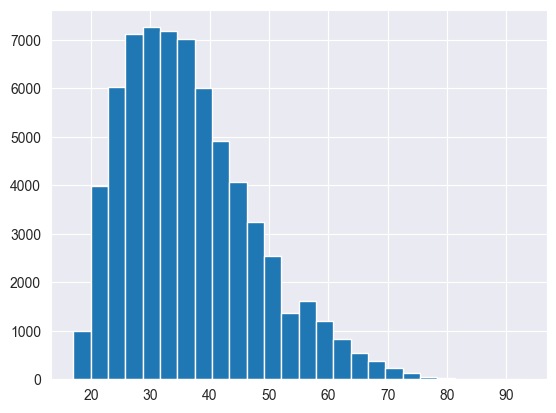

In [31]:
df_ex2_subset["AGE"].hist(bins=number_of_rooms)

#### 2.4.2 Log axes
Make a scatter plot of the FINE variables and the AGE variable

<Axes: xlabel='AGE', ylabel='FINE'>

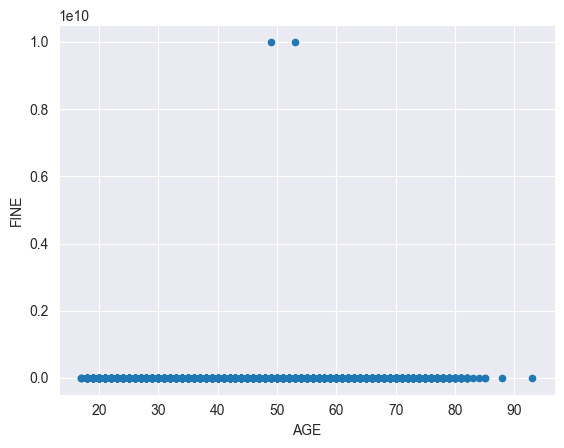

In [32]:
df_ex2_subset.plot.scatter(x='AGE', y='FINE')

As you should have seen, there is a lot of data points near the x-axis. Now you can try to plot it on a log y-axis and see the difference

<Axes: xlabel='AGE', ylabel='FINE'>

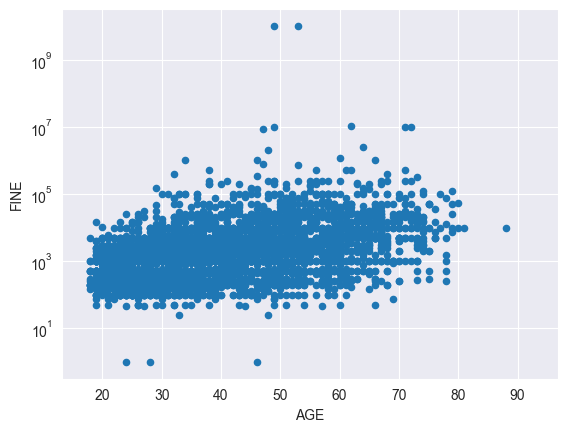

In [33]:
df_ex2_subset.plot.scatter(x='AGE', y='FINE', logy=True)

**Question**
Do you see a problem with this visualisation? Do you think of another visualisation that would allow you to get some other insights about the data?  

With this visualisation, it is possible to see the distributions of the two variables, but it's not the best because points may overlap, and we would not be able to see it. A heatmap or something like this could be better.

#### 2.4.3: Correlation visualisation (not quite analysis yet, wait for next week :))

You already saw a way to visualise correlation in the first exercise, where you plotted the two timestamp related column in one scatter plot. Now you will see how to do it wth multiple of variable at the same time, instead of doing it one by one.

A somewhat convenient way to visualize the correlation between a lot of variable (comparing each variable with each other variable, two by two) is to use pair-plots from sns. 

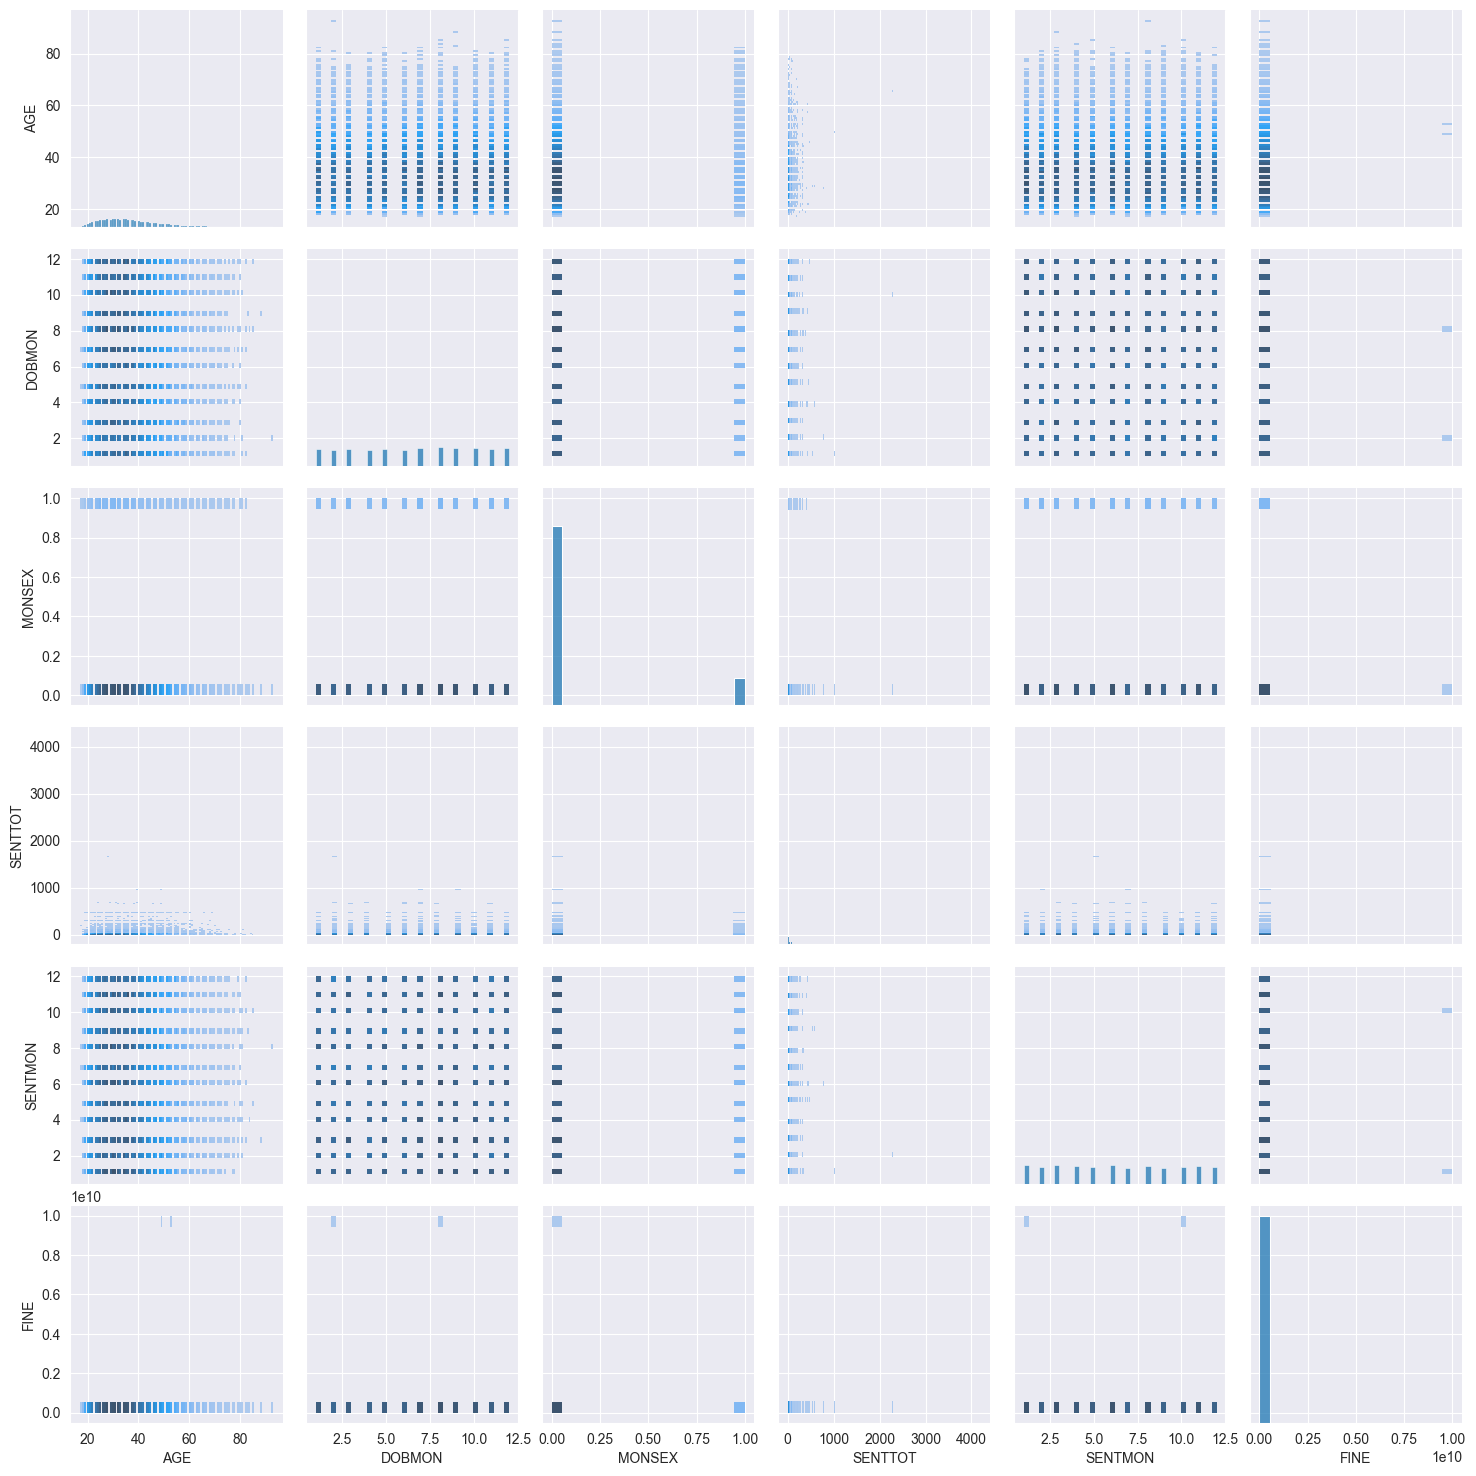

In [35]:
# you can play with the kind= parameter to see the different output that it gives you (the execution might take some time on you laptop, like 3-4 minutes... So maybe duplicate this cell and run it with the different parameter values, so you can keep the 4 results in your notebook :)
# value that you can try are: ‘scatter’, ‘kde’, ‘hist’, ‘reg’
pp = sns.pairplot(df_ex2_subset, kind='hist')

**Question**
What are the main differences with the different parameter you tried? Is there one or more that you wouldn't advise to use in this case? And if yes, why?


For the same reason mentioned before, the scatter plot is not the best to see the distribution. 


This gave you a way to conclude a visual analysis of the correlation between variable, but most of the time it is really hard to do it like that. Especially next week, you will need to get more numerical value, so we already show you how to get the same grid as before, but with the correlation value, instead of graph :)

In [36]:
df_ex2_corr = df_ex2_subset.corr()
df_ex2_corr

,AGE,DOBMON,MONSEX,SENTTOT,SENTMON,FINE
AGE,1.000000,-0.008161,0.022846,0.038914,-0.000299,0.007160
DOBMON,-0.008161,1.000000,0.003466,0.006851,-0.002809,-0.002529
MONSEX,0.022846,0.003466,1.000000,-0.068814,0.000213,-0.002155
SENTTOT,0.038914,0.006851,-0.068814,1.000000,-0.004701,0.004456
SENTMON,-0.000299,-0.002809,0.000213,-0.004701,1.000000,-0.001445
FINE,0.007160,-0.002529,-0.002155,0.004456,-0.001445,1.000000


A table is already a sort of visualisation, but as you're a senior visualist, try to do a heatmap with the correlation :) results. 

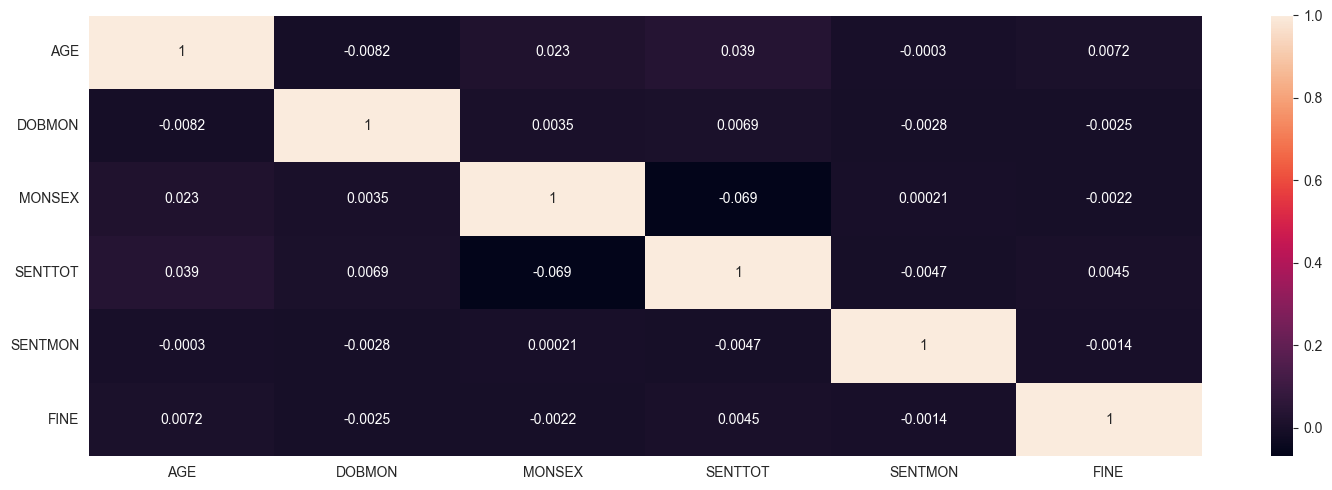

In [38]:
plt.figure(figsize=(15, 5)) 
sns.heatmap(df_ex2_corr, annot=True)
plt.tight_layout() 

**Question**
Short break to breathe and look outside :) we will get to this next week (with different data) ;)

Hint: the correlation is pretty insisting between those variables...

### 2.4.4 Regression plot

With the previous visualization, you certainly noticed that some variables seem to be correlated. You can see this interaction by plotting a regression plot. It uses linear regression, that the course didn't cover yet, so you'll need to wait a little bit for the technical explanation if you don't quiet understand everything it's doing.
Reference : [Correlation metric](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) and [plotting](https://seaborn.pydata.org/generated/seaborn.regplot.html). BE WARNED: correlation is not causation...

So now take your original data again and extract a new subset containing following column: 
- AGE
- SENTTOT
- SENTTOT_PREDICT1
- SENTTOT_PREDICT2
- SENTTOT_PREDICT3

In [ ]:
column_names_senttot = ['AGE', 'SENTTOT', 'SENTTOT_PREDICT1', 'SENTTOT_PREDICT2', 'SENTTOT_PREDICT3']

df_ex2_subset_senttot = df_ex2[column_names_senttot]

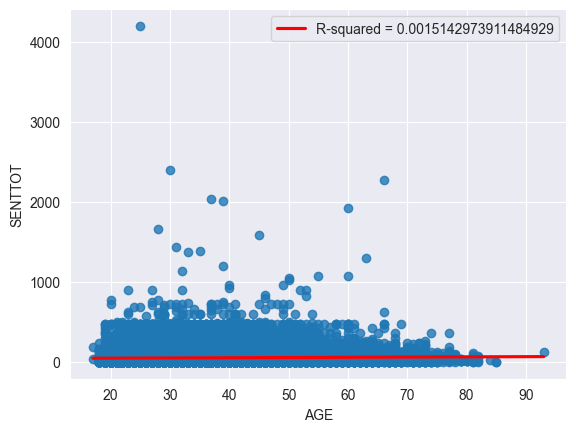

In [39]:
r_squared = df_ex2_subset_senttot['AGE'].corr(df_ex2_subset['SENTTOT']) ** 2

sns.regplot(df_ex2_subset_senttot, x='AGE', y='SENTTOT', line_kws={'color': 'red', 'label': f'R-squared = {r_squared}'})
plt.legend()


The previous graph is useful to visualise how a model predict a quantitative variable. You can play with the columns SENTTOT_PREDICTX to see which of the three models matches the best with SENTTOT column. 


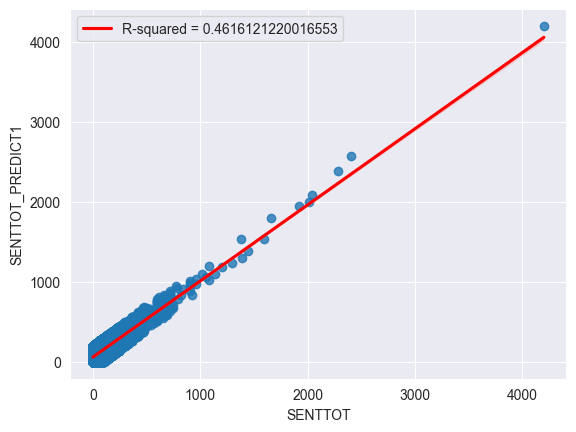

In [48]:
r_squared = df_ex2_subset_senttot['SENTTOT'].corr(df_ex2_subset['SENTTOT_PREDICT1']) ** 2

sns.regplot(df_ex2_subset_senttot, x='SENTTOT', y='SENTTOT_PREDICT1', line_kws={'color': 'red', 'label': f'R-squared = {r_squared}'})
plt.legend()

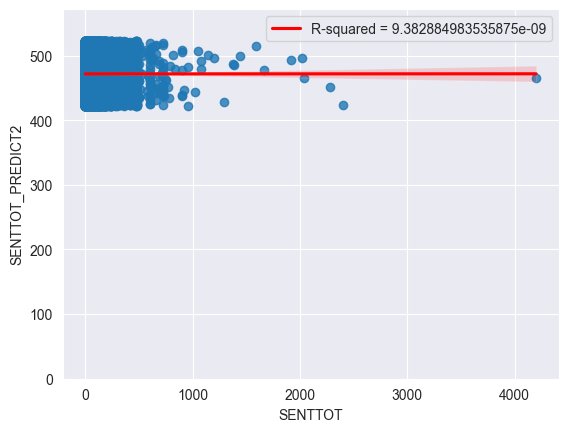

In [53]:
r_squared = df_ex2_subset_senttot['SENTTOT'].corr(df_ex2_subset['SENTTOT_PREDICT2']) ** 2

sns.regplot(df_ex2_subset_senttot, x='SENTTOT', y='SENTTOT_PREDICT2', line_kws={'color': 'red', 'label': f'R-squared = {r_squared}'}, )
plt.ylim(0,df_ex2_subset_senttot['SENTTOT_PREDICT2'].max()+50)
plt.legend()

## Exercise 3: Confusion matrices / Visualizing Errors in Classification

Confusion Matrices, sometimes called error matrices, visualize the kinds of errors your machine learning algorithm makes.
You might know the confusion matrix for binary classifications (cf. Table 1).

|                      | **Predicted_Label_True** | **Predicted_Label_False** |
|----------------------|--------------------------|---------------------------|
| **True_Label_True**  | True Positive            | False Negative            |
| **True_Label_False** | False Positive           | True Negative             |
_Table 1: Confusion Matrix for binary Classification tasks._

If you have multiple classes, the confusion matrix not only indicates what kind of error the classification commits but also helps indicate which classes get confused. This helps identify biases or indicate potential problems in the dataset.

For this exercise, imagine you are trying to classify the native language of the author of a given text. You know the native language of the author is either English ('en'), German ('de'), French ('fr'), Spanish ('es') or Portuguese ('pt'). Those are your 5 classes. The file that you can find in the "language_predictions" foldr are the result of 4 classifiers you tried. One column contains the real value of the language (ground-truth data) and the other contains the value that was predicted by the classifiers. 


### 3.1 Load the data

Load the first file "prediction_0.csv"

In [54]:
data_folder_ex2 = Path(r"data/predictions")

df_pred_0 = pd.read_csv(data_folder_ex2 / "prediction_0.csv")

### 3.2: Visualize a classification




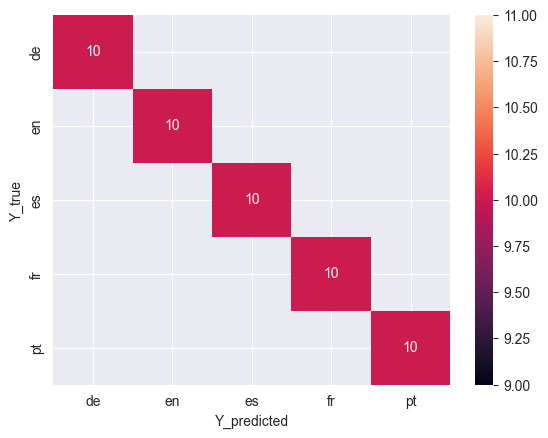

In [55]:
#Make a confusion matrix using sns
#Link to documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
#Step 0: Transform the data into the right shape
#You need to have a table where the y_true is the index and y_predicted is the column, the number of occurrences of a given combination needs to be the data
#Lookup pd.pivot_table 
df_matrix= df_pred_0.groupby(['Y_true','Y_predicted']).size() #This counts the number of occurrences of a combination of labels
df_matrix= df_matrix.to_frame(name = 'size').reset_index() #This creates a dataframe
df_matrix= pd.pivot(df_matrix, values='size', columns='Y_predicted', index='Y_true')#This puts everything into the correct form
#Step 1: Heatmap
sns.heatmap(df_matrix, annot=True)
plt.show()


Normally, you should realize that this classifier is wonderful (certainly too good to be true, sadly). Can you explain how did you notice that it was a "perfect" classifier?

What yould be a reason for having achieved 100% accuracy?

### 3.3: Comparing different classifier

Now that you have make your first confusion matrices (in this course nonetheless), you can create confusion matrices for the 3 other classifiers, and try to evaluate them. We didn't show you how to compute the accuracy of a classifier (yet) so try to evaluate them just by using the confusion matrices :)

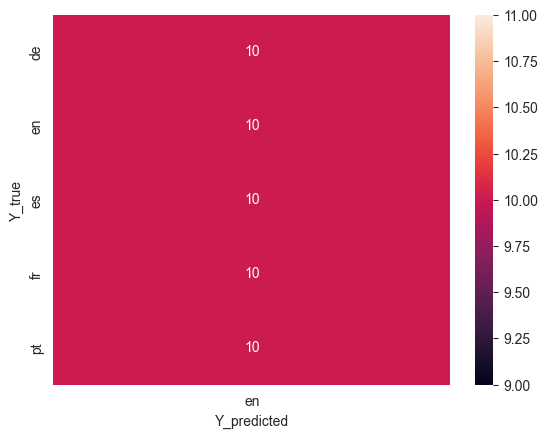

In [59]:
df_pred_1 = pd.read_csv(data_folder_ex2 / "prediction_1.csv")

#Lookup pd.pivot_table 
df_matrix= df_pred_1.groupby(['Y_true','Y_predicted']).size() #This counts the number of occurrences of a combination of labels
df_matrix= df_matrix.to_frame(name = 'size').reset_index() #This creates a dataframe
df_matrix= pd.pivot(df_matrix, values='size', columns='Y_predicted', index='Y_true')#This puts everything into the correct form
#Step 1: Heatmap
sns.heatmap(df_matrix, annot=True)
plt.show()

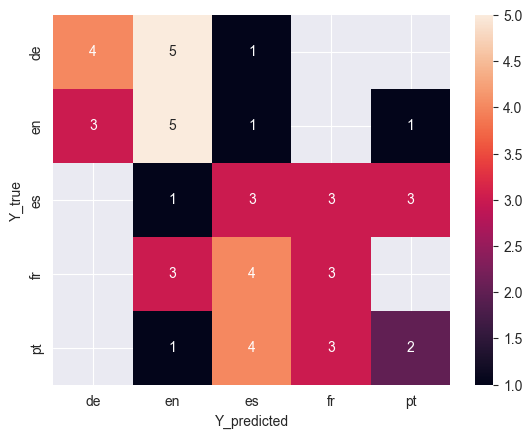

In [60]:
df_pred_2 = pd.read_csv(data_folder_ex2 / "prediction_2.csv")

#Lookup pd.pivot_table 
df_matrix= df_pred_2.groupby(['Y_true','Y_predicted']).size() #This counts the number of occurrences of a combination of labels
df_matrix= df_matrix.to_frame(name = 'size').reset_index() #This creates a dataframe
df_matrix= pd.pivot(df_matrix, values='size', columns='Y_predicted', index='Y_true')#This puts everything into the correct form
#Step 1: Heatmap
sns.heatmap(df_matrix, annot=True)
plt.show()

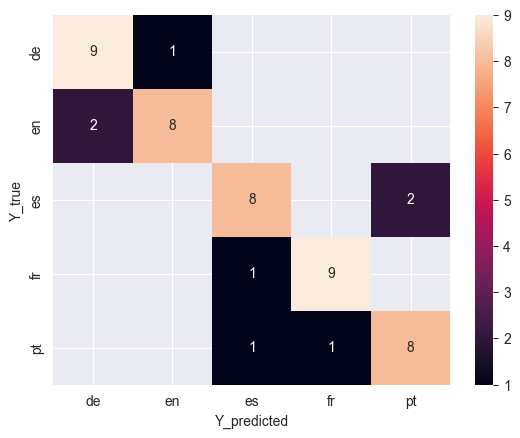

In [61]:
df_pred_3 = pd.read_csv(data_folder_ex2 / "prediction_3.csv")

#Lookup pd.pivot_table 
df_matrix= df_pred_3.groupby(['Y_true','Y_predicted']).size() #This counts the number of occurrences of a combination of labels
df_matrix= df_matrix.to_frame(name = 'size').reset_index() #This creates a dataframe
df_matrix= pd.pivot(df_matrix, values='size', columns='Y_predicted', index='Y_true')#This puts everything into the correct form
#Step 1: Heatmap
sns.heatmap(df_matrix, annot=True)
plt.show()

## Exercise 4: Work on your project :)

If you already have data for your project, do not hesitate to start doing some exploration by visualizing your data (maybe in another notebook to make you life easier, but you do you ;))